In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim


In [2]:
df = pd.read_csv('SolarPrediction.csv')
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [3]:


# Rename 'Data' column to 'DateTime' for clarity
df = df.rename(columns={'Data': 'DateTime'})

# Convert DateTime to pandas datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Convert Time column to datetime.time objects for better handling
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Similarly, convert sunrise and sunset times
df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S').dt.time
df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S').dt.time

# Sort by DateTime to ensure proper plotting
df = df.sort_values('DateTime')
df

/var/folders/4q/4w3g7t5n0td3xk6v5zqfpp2w0000gn/T/ipykernel_19543/3483626208.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['DateTime'])


,UNIXTime,DateTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
7223,1472793006,2016-09-01,19:10:06,2.53,55,30.45,65,155.71,3.37,06:07:00,18:38:00
7257,1472781308,2016-09-01,15:55:08,628.80,63,30.42,58,1.55,6.75,06:07:00,18:38:00
7256,1472781606,2016-09-01,16:00:06,596.57,62,30.42,56,81.70,5.62,06:07:00,18:38:00
7255,1472781907,2016-09-01,16:05:07,577.10,62,30.42,57,53.61,7.87,06:07:00,18:38:00
7254,1472782211,2016-09-01,16:10:11,573.13,62,30.42,58,14.04,3.37,06:07:00,18:38:00
...,...,...,...,...,...,...,...,...,...,...,...
24714,1483206901,2016-12-31,07:55:01,39.30,43,30.31,86,262.51,5.62,06:57:00,17:54:00
24715,1483206602,2016-12-31,07:50:02,39.51,42,30.31,85,265.53,7.87,06:57:00,17:54:00
24716,1483206302,2016-12-31,07:45:02,52.87,42,30.31,84,240.48,4.50,06:57:00,17:54:00
24664,1483221902,2016-12-31,12:05:02,378.41,53,30.33,68,321.95,10.12,06:57:00,17:54:00


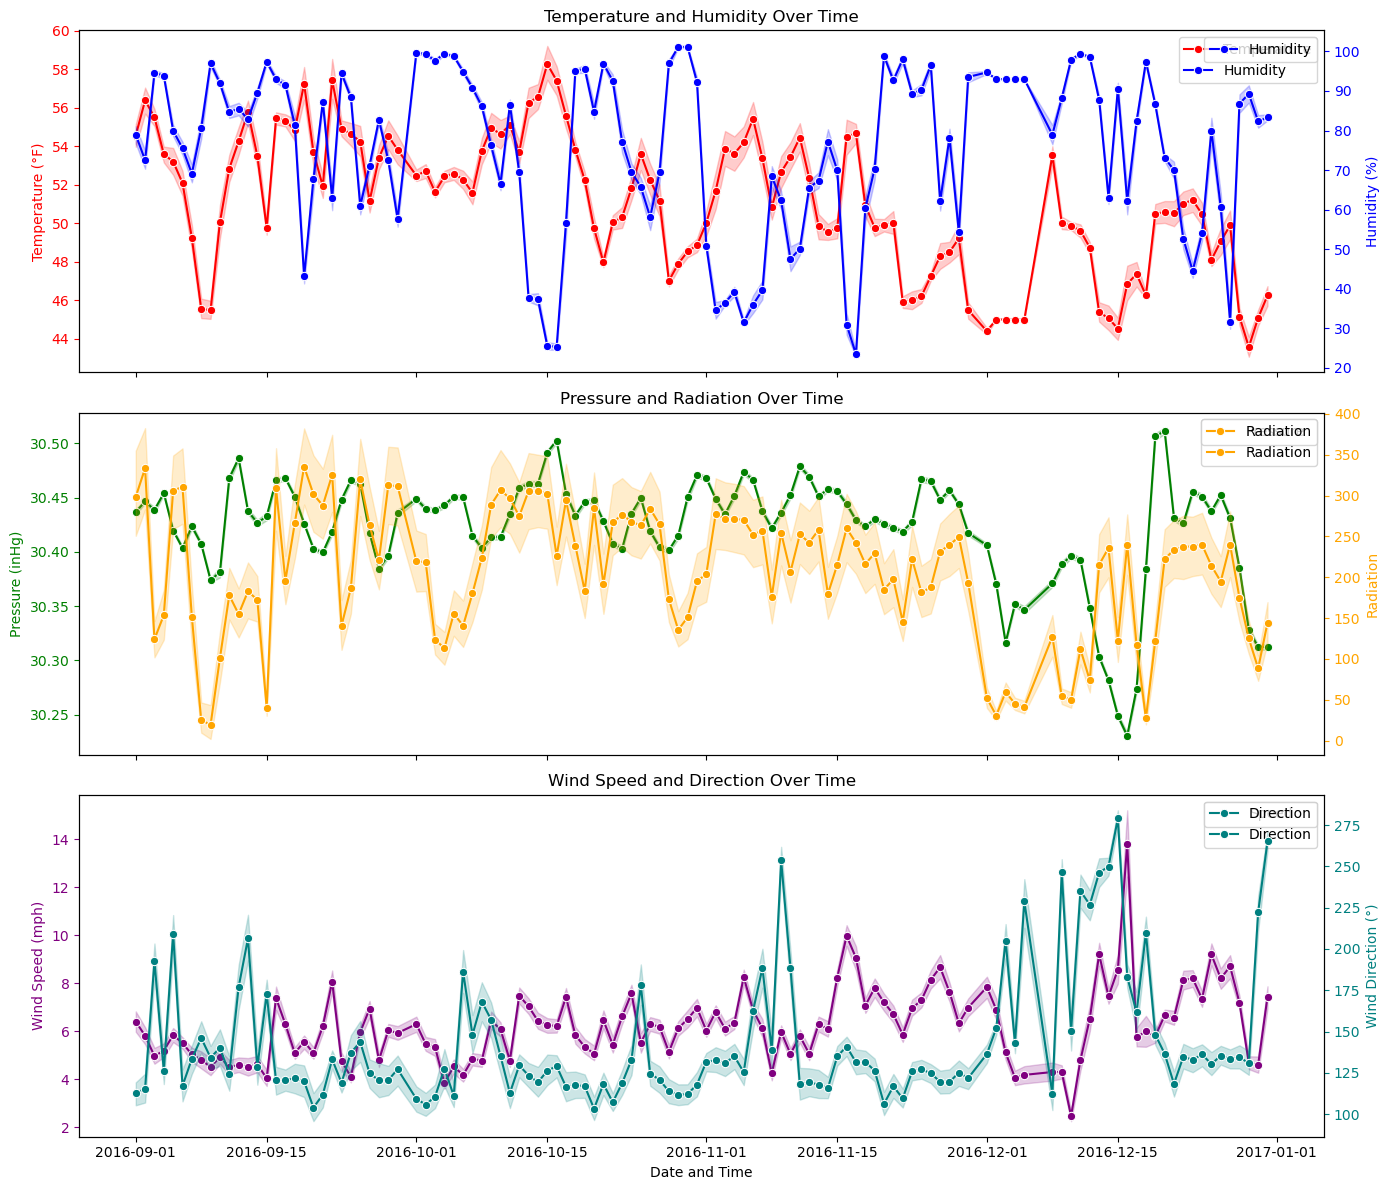

In [4]:

# Alternative visualization: Create a combined plot for related measurements
# Create a figure for related measurements (grouped by type)
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Temperature and Humidity - often related
ax1 = axes[0]
ax1.set_title('Temperature and Humidity Over Time')
ax1_twin = ax1.twinx()  # Create a twin axis for Humidity

# Plot Temperature on left axis
sns.lineplot(x='DateTime', y='Temperature', data=df, marker='o', color='red', label='Temperature', ax=ax1)
ax1.set_ylabel('Temperature (°F)', color='red')
ax1.tick_params(axis='y', colors='red')

# Plot Humidity on right axis
sns.lineplot(x='DateTime', y='Humidity', data=df, marker='o', color='blue', label='Humidity', ax=ax1_twin)
ax1_twin.set_ylabel('Humidity (%)', color='blue')
ax1_twin.tick_params(axis='y', colors='blue')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Pressure and Radiation
ax2 = axes[1]
ax2.set_title('Pressure and Radiation Over Time')
ax2_twin = ax2.twinx()  # Create a twin axis for Radiation

# Plot Pressure on left axis
sns.lineplot(x='DateTime', y='Pressure', data=df, marker='o', color='green', label='Pressure', ax=ax2)
ax2.set_ylabel('Pressure (inHg)', color='green')
ax2.tick_params(axis='y', colors='green')

# Plot Radiation on right axis
sns.lineplot(x='DateTime', y='Radiation', data=df, marker='o', color='orange', label='Radiation', ax=ax2_twin)
ax2_twin.set_ylabel('Radiation', color='orange')
ax2_twin.tick_params(axis='y', colors='orange')

# Add legend
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Wind Speed and Direction
ax3 = axes[2]
ax3.set_title('Wind Speed and Direction Over Time')
ax3_twin = ax3.twinx()  # Create a twin axis for Direction

# Plot Speed on left axis
sns.lineplot(x='DateTime', y='Speed', data=df, marker='o', color='purple', label='Speed', ax=ax3)
ax3.set_ylabel('Wind Speed (mph)', color='purple')
ax3.tick_params(axis='y', colors='purple')

# Plot Direction on right axis
sns.lineplot(x='DateTime', y='WindDirection(Degrees)', data=df, marker='o', color='teal', 
             label='Direction', ax=ax3_twin)
ax3_twin.set_ylabel('Wind Direction (°)', color='teal')
ax3_twin.tick_params(axis='y', colors='teal')

# Add legend
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Format the x-axis with appropriate date formatting for all subplots
plt.xticks(rotation=45)
ax3.set_xlabel('Date and Time')
plt.tight_layout()

plt.show()




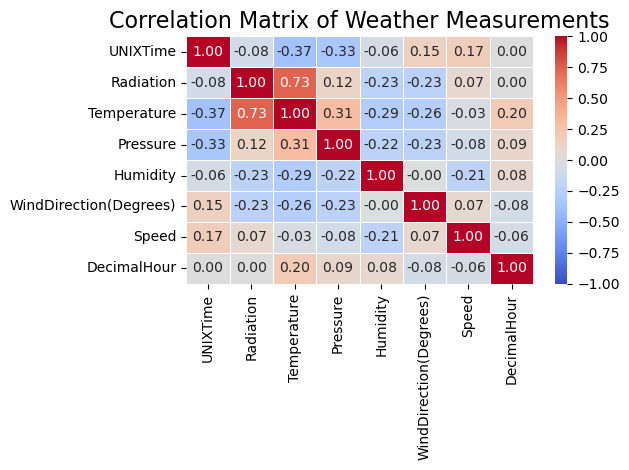

In [5]:
#plot correletions

df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['Minute'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.minute
# Create a decimal hour (hour + minute/60) for better correlation
df['DecimalHour'] = df['Hour'] + df['Minute']/60

# Select only numeric columns for correlation analysis
numeric_columns = ['UNIXTime', 'Radiation', 'Temperature', 'Pressure', 
                   'Humidity', 'WindDirection(Degrees)', 'Speed', 
                   'DecimalHour']
corr_df = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# 1. Create a correlation heatmap
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Weather Measurements', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## LSTM NN

In [ ]:
import lstm

target_col = 'Radiation'  # Column to predict
window_size = 24  # Use 12 previous time steps (~1 hour) to predict the next value

X_train, X_val, X_test, y_train, y_val, y_test, scaler, feature_cols = lstm.prepare_weather_data(df, target_col=target_col, window_size=window_size, test_size=0.2, val_size=0.2)


X_train shape: (31367, 24, 14)
y_train shape: (31367, 1)
X_val shape: (641, 24, 14)
y_val shape: (641, 1)
X_test shape: (654, 24, 14)
y_test shape: (654, 1)
Features used: ['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'SunriseMinutes', 'SunsetMinutes', 'DaylightMinutes', 'TimeSinceSunrise', 'TimeUntilSunset', 'DaylightPosition', 'TimeMinutesSin', 'TimeMinutesCos']


In [7]:


input_dim = len(feature_cols)  # Number of features
hidden_dim = 256  # Number of hidden units (increased from 64)
num_layers = 2  # Number of LSTM layers
output_dim = 1  # Dimension of output (predicting a single value)
    
# Initialize model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = lstm.WeatherLSTM(input_dim, hidden_dim, num_layers, output_dim).to(device)


    

In [ ]:
# Train the model with advanced features
model.fit(X_train, y_train, X_val, y_val, epochs=100, batch_size=32, 
              learning_rate=0.001, patience=10, factor=0.5, min_lr=1e-6, device="cpu",
            scheduler_type="cosine", T_max=None, weight_decay=1e-5, clip_grad_norm=1.0)

X_train shape: (31367, 24, 14), y_train shape: (31367, 1)
X_val shape: (641, 24, 14), y_val shape: (641, 1)
Regularization settings:
- Dropout probability: 0.3
- L2 regularization (weight decay): 1e-05
- Gradient clipping norm: 1.0
Using ReduceLROnPlateau scheduler


/Users/tom/anaconda3/envs/torch-gpu-2/lib/python3.9/site-packages/torch/optim/optimizer.py:242: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if not is_compiling() and torch.has_cuda and torch.cuda.is_available():


Epoch 1/100 - Train loss: 0.004795 - Val loss: 0.002941 - Val RMSE: 0.054232
Epoch 2/100 - Train loss: 0.003281 - Val loss: 0.003487 - Val RMSE: 0.059047
Epoch 3/100 - Train loss: 0.003256 - Val loss: 0.002617 - Val RMSE: 0.051161
Epoch 4/100 - Train loss: 0.003307 - Val loss: 0.002788 - Val RMSE: 0.052800
Epoch 5/100 - Train loss: 0.003260 - Val loss: 0.002583 - Val RMSE: 0.050821
Epoch 6/100 - Train loss: 0.003237 - Val loss: 0.002945 - Val RMSE: 0.054272
Epoch 7/100 - Train loss: 0.003258 - Val loss: 0.002725 - Val RMSE: 0.052204
Epoch 8/100 - Train loss: 0.003281 - Val loss: 0.003024 - Val RMSE: 0.054990
Epoch 9/100 - Train loss: 0.003170 - Val loss: 0.002808 - Val RMSE: 0.052989
Epoch 10/100 - Train loss: 0.003212 - Val loss: 0.002619 - Val RMSE: 0.051178
Epoch 11/100 - Train loss: 0.003200 - Val loss: 0.002647 - Val RMSE: 0.051449
Epoch 00011: reducing learning rate of group 0 to 5.0000e-04.
Epoch 12/100 - Train loss: 0.003046 - Val loss: 0.002484 - Val RMSE: 0.049835
Epoch 13/10

WeatherLSTM(
  (lstm): LSTM(14, 256, num_layers=2, batch_first=True, dropout=0.3)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (relu): ReLU()
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)

Training Summary:
Total Epochs: 35
Best Validation Loss: 0.002428 (Epoch 25)
Best Validation RMSE: 0.049270 (Epoch 25)
Final Training Loss: 0.002749
Final Validation Loss: 0.002466
Final Validation RMSE: 0.049658


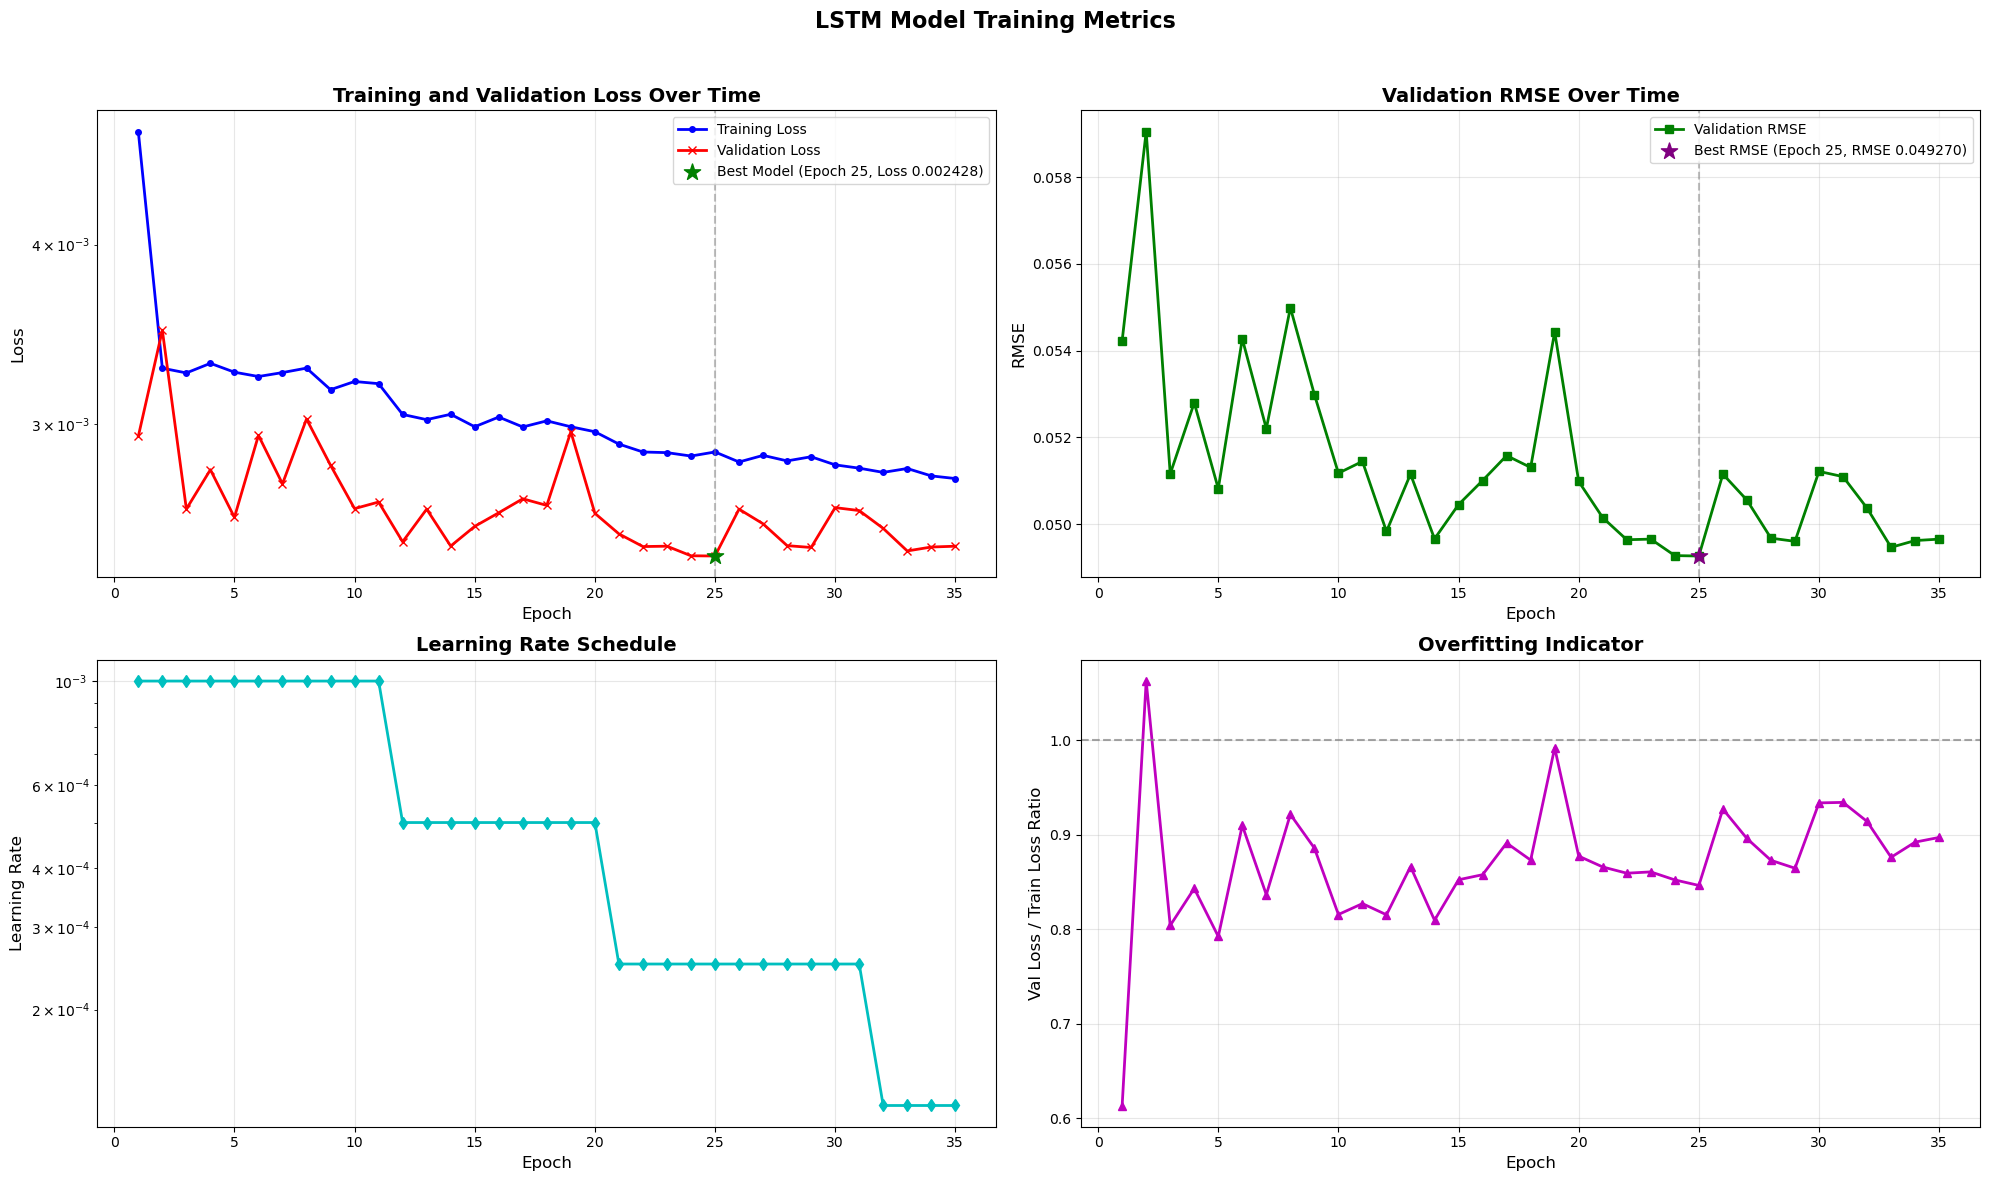

In [9]:
# Visualize training metrics
fig = model.plot_training_history()
plt.show()

In [10]:
# Evaluate on test data
predictions, actuals = model.evaluate(X_test, y_test, device=device)
    
# Inverse transform to get actual temperature values
predictions_orig = scaler[target_col].inverse_transform(predictions)
actuals_orig = scaler[target_col].inverse_transform(actuals)
    
# Calculate RMSE in original scale
rmse = np.sqrt(np.mean((predictions_orig - actuals_orig) ** 2))
print(f"Test RMSE (original scale): {rmse:.4f}")
    


Test RMSE: 0.046399
Test RMSE (original scale): 74.2450


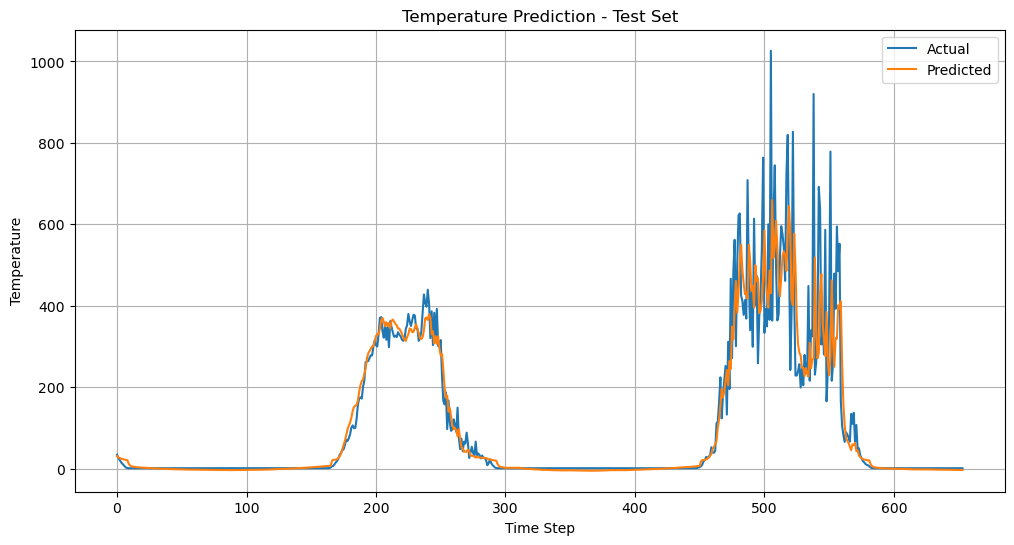

In [11]:
#plot predictions

plt.figure(figsize=(12, 6))
plt.plot(actuals_orig, label='Actual')
plt.plot(predictions_orig, label='Predicted')
plt.title('Temperature Prediction - Test Set')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

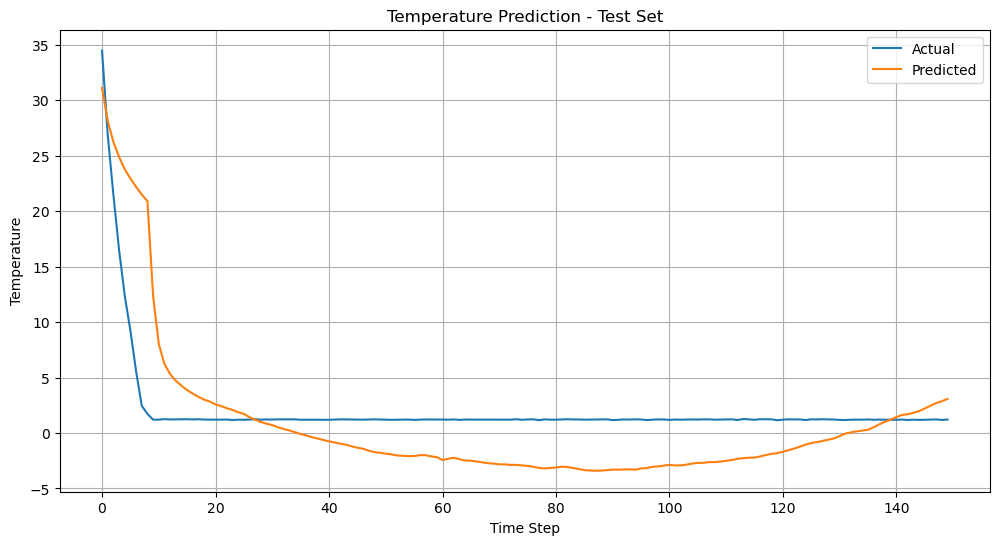

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(actuals_orig[0:150], label='Actual')
plt.plot(predictions_orig[0:150], label='Predicted')
plt.title('Temperature Prediction - Test Set')
plt.xlabel('Time Step')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

Resampling data to 1min frequency...
Original data points: 654, After resampling: 654
Evaluation Summary:
Number of samples (after resampling): 654
RMSE: 74.244979
MAE: 28.709806
MAPE: 169.44%
R²: 0.823693
Correlation: 0.907924


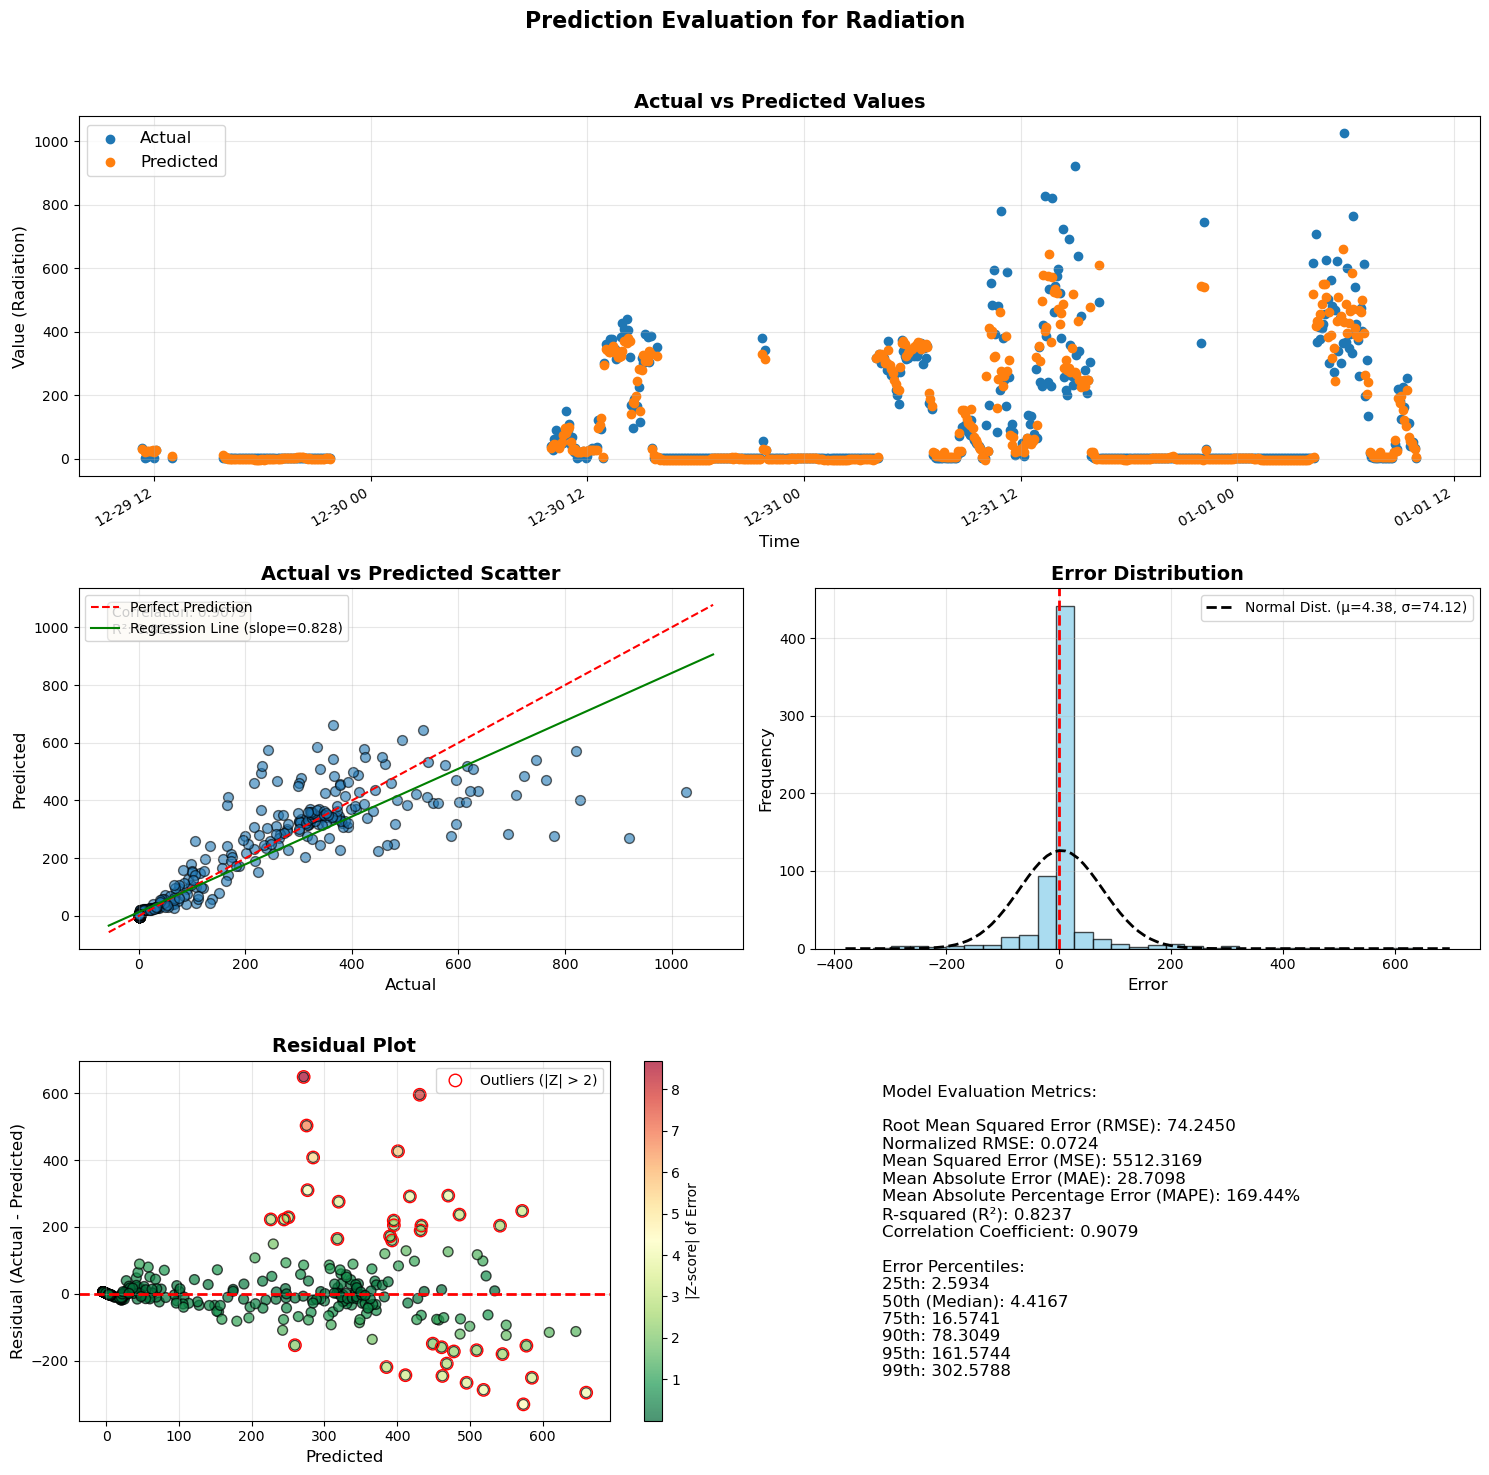

In [13]:
import plot_utils as pu # Make sure you're importing the module correctly

# You can create timestamps if your data has a time component
timestamps = df['UNIXTime'].values[-len(predictions):]  # assuming UNIXTime exists in your df

# Make sure scaler is a dictionary with target_col as key
if not isinstance(scaler, dict):
    scalers_dict = {target_col: scaler}
else:
    scalers_dict = scaler

fig_eval = pu.create_evaluation_dashboard(
    predictions=predictions, 
    actuals=actuals, 
    scalers=scalers_dict,  # Changed from 'scaler' to 'scalers' to match function definition
    target_col=target_col,
    timestamps=timestamps
)


In [14]:
model.save('weather_lstm_model.pt')

Model saved to weather_lstm_model.pt


## Multivariate LSTM